In [1]:
pip install miceforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 3.2 MB/s 
     |████████████████████████████████| 2.0 MB 10.2 MB/s 
     |████████████████████████████████| 2.6 MB 46.1 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [2]:
from google.colab import drive
drive.mount('./content')

Mounted at ./content


In [3]:
cd /content/content/MyDrive/Untitled Folder/Bayesian Neural network/deterministic-variational-inference-master

/content/content/MyDrive/Untitled Folder/Bayesian Neural network/deterministic-variational-inference-master


In [4]:
import pandas as pd
from math import sqrt
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [5]:
cd /content/content/MyDrive/DropoutUncertaintyExps-master/Hydrid_modeling

/content/content/MyDrive/DropoutUncertaintyExps-master/Hydrid_modeling


In [6]:
from data_processing import DataProcessing
p1_2020 = pd.read_csv('EndUserData2020P2.csv', encoding = 'ISO-8859-1', skiprows = [0,2])
p1_2021 = pd.read_csv('EndUserData2021P2_fix.csv', encoding = 'ISO-8859-1', skiprows = [0,2])
p1_2020_value = DataProcessing(p1_2020, p1_2021).data_process_20()
p1_2021_value = DataProcessing(p1_2020, p1_2021).data_process_21()

In [8]:
p1_2020_value = p1_2020_value.astype('float64')
p1_2020_value['NB2_S_x_NYZ_x_x_Fcw_x'] *= 0.28
p1_2020_value['NB2_S_1_NYZ_sys_x_PcwOut_x'] *= 100000
p1_2020_value['NB2_S_1_NYZ_sys_x_PcwIn_x'] *= 100000



In [9]:
p1_2020_value

NB2_S_1_NYZ_sys_x_PcwOut_x  NB2_S_1_NYZ_sys_x_PcwIn_x  \
0                        443000.0                   381940.0   
1                        442000.0                   382810.0   
2                        443000.0                   381940.0   
3                        442000.0                   381080.0   
4                        443000.0                   382810.0   
...                           ...                        ...   
89275                    516000.0                   430560.0   
89276                    517000.0                   431420.0   
89277                    516000.0                   431420.0   
89278                    516000.0                   430560.0   
89279                    516000.0                   429690.0   

       NB2_S_1_NYZ_cwp_9_HzSPR_x  NB2_S_1_NYZ_cwp_10_HzSPR_x  \
0                            0.0                      0.0000   
1                            0.0                      0.0000   
2                            0.0                      0.0000   
3                            0.0                      0.0000   
4                            0.0                      0.0000   
...                          ...                         ...   
89275                       28.9                     28.9094   
89276                       28.9                     28.9121   
89277                       28.9                     28.8927   
89278                       28.9                     28.8824   
89279                       28.9                     28.8825   

       NB2_S_1_NYZ_cwp_11_HzSPR_x  NB2_S_1_NYZ_cwp_12_HzSPR_x  \
0                         26.8020                     26.8020   
1                         26.7771                     26.7771   
2                         26.7873                     26.7873   
3                         26.7825                     26.7825   
4                         26.7585                     26.7585   
...                           ...                         ...   
89275                     28.9034                      0.0000   
89276                     28.9105                      0.0000   
89277                     28.8927                      0.0000   
89278                     28.8824                      0.0000   
89279                     28.8825                      0.0000   

       NB2_S_x_NYZ_x_x_Fcw_x  p_diff  
0                 159.808208  0.6106  
1                 159.808208  0.5919  
2                 159.808208  0.6106  
3                 160.017536  0.6092  
4                 160.017536  0.6019  
...                      ...     ...  
89275             242.527264  0.8544  
89276             240.484944  0.8558  
89277             240.484944  0.8458  
89278             240.484944  0.8544  
89279             239.154496  0.8631  

[78187 rows x 8 columns]

In [47]:
Y_20 = p1_2020_value['NB2_S_x_NYZ_x_x_Fcw_x']
X_20 = pd.DataFrame(np.c_[p1_2020_value['NB2_S_1_NYZ_sys_x_PcwOut_x'], p1_2020_value['NB2_S_1_NYZ_sys_x_PcwIn_x'], p1_2020_value['NB2_S_1_NYZ_cwp_9_HzSPR_x'], p1_2020_value['NB2_S_1_NYZ_cwp_10_HzSPR_x'], p1_2020_value['NB2_S_1_NYZ_cwp_11_HzSPR_x'], p1_2020_value['NB2_S_1_NYZ_cwp_12_HzSPR_x']], columns = ['NB2_S_1_NYZ_sys_x_PcwOut_x', 'NB2_S_1_NYZ_sys_x_PcwIn_x', 'NB2_S_1_NYZ_cwp_9_HzSPR_x', 'NB2_S_1_NYZ_cwp_10_HzSPR_x', 'NB2_S_1_NYZ_cwp_11_HzSPR_x', 'NB2_S_1_NYZ_cwp_12_HzSPR_x'])
xgb_21_y = p1_2021_value['NB2_S_x_NYZ_x_x_Fcw_x']
xgb_21_X = pd.DataFrame(np.c_[p1_2021_value['NB2_S_1_NYZ_sys_x_PcwOut_x'], p1_2021_value['NB2_S_1_NYZ_sys_x_PcwIn_x'], p1_2021_value['NB2_S_1_NYZ_cwp_9_HzSPR_x'], p1_2021_value['NB2_S_1_NYZ_cwp_10_HzSPR_x'], p1_2021_value['NB2_S_1_NYZ_cwp_11_HzSPR_x'],  p1_2021_value['NB2_S_1_NYZ_cwp_12_HzSPR_x']], columns = ['NB2_S_1_NYZ_sys_x_PcwOut_x', 'NB2_S_1_NYZ_sys_x_PcwIn_x', 'NB2_S_1_NYZ_cwp_9_HzSPR_x', 'NB2_S_1_NYZ_cwp_10_HzSPR_x', 'NB2_S_1_NYZ_cwp_11_HzSPR_x', 'NB2_S_1_NYZ_cwp_12_HzSPR_x'])


In [51]:
Y_20 = p1_2020_value['NB2_S_x_NYZ_x_x_Fcw_x']
X_20 = pd.DataFrame(np.c_[p1_2020_value['NB2_S_1_NYZ_sys_x_PcwOut_x'], p1_2020_value['NB2_S_1_NYZ_sys_x_PcwIn_x'], p1_2020_value['NB2_S_1_NYZ_cwp_9_HzSPR_x'], p1_2020_value['NB2_S_1_NYZ_cwp_10_HzSPR_x'], p1_2020_value['NB2_S_1_NYZ_cwp_11_HzSPR_x'], p1_2020_value['NB2_S_1_NYZ_cwp_12_HzSPR_x']], columns = ['NB2_S_1_NYZ_sys_x_PcwOut_x', 'NB2_S_1_NYZ_sys_x_PcwIn_x', 'NB2_S_1_NYZ_cwp_9_HzSPR_x', 'NB2_S_1_NYZ_cwp_10_HzSPR_x', 'NB2_S_1_NYZ_cwp_11_HzSPR_x', 'NB2_S_1_NYZ_cwp_12_HzSPR_x'])
p1_2021_value = pd.read_csv('/content/content/MyDrive/test_dataset.csv')
p1_2021_value = p1_2021_value.drop(['Unnamed: 7'],axis = 1)
p1_2021_value = p1_2021_value.drop(['MAPE'], axis = 1)
xgb_21_y = p1_2021_value['NB2_S_x_NYZ_x_x_Fcw_x']
xgb_21_X = pd.DataFrame(np.c_[p1_2021_value['NB2_S_1_NYZ_sys_x_PcwOut_x'], p1_2021_value['NB2_S_1_NYZ_sys_x_PcwIn_x'], p1_2021_value['NB2_S_1_NYZ_cwp_9_HzSPR_x'], p1_2021_value['NB2_S_1_NYZ_cwp_10_HzSPR_x'], p1_2021_value['NB2_S_1_NYZ_cwp_11_HzSPR_x'],  p1_2021_value['NB2_S_1_NYZ_cwp_12_HzSPR_x']], columns = ['NB2_S_1_NYZ_sys_x_PcwOut_x', 'NB2_S_1_NYZ_sys_x_PcwIn_x', 'NB2_S_1_NYZ_cwp_9_HzSPR_x', 'NB2_S_1_NYZ_cwp_10_HzSPR_x', 'NB2_S_1_NYZ_cwp_11_HzSPR_x', 'NB2_S_1_NYZ_cwp_12_HzSPR_x'])
xgb_20_len = len(p1_2020_value)
xgb_20_train_len = int(xgb_20_len * 0.7)

TypeError: ignored

In [50]:
xgb_20_len = len(p1_2020_value)
xgb_20_train_len = int(xgb_20_len * 0.7)

xgb_20_train_X = X_20[0: xgb_20_train_len].values
xgb_20_valid_X = X_20[xgb_20_train_len: ].values
xgb_20_train_y = Y_20[0: xgb_20_train_len].values
xgb_20_valid_y = Y_20[xgb_20_train_len: ].values

xgb_21_X = xgb_21_X.values
xgb_21_y = xgb_21_y.values


KeyError: ignored

In [14]:
xgb_20_train_X

array([[4.43000e+05, 3.81940e+05, 0.00000e+00, 0.00000e+00, 2.68020e+01,
        2.68020e+01],
       [4.42000e+05, 3.82810e+05, 0.00000e+00, 0.00000e+00, 2.67771e+01,
        2.67771e+01],
       [4.43000e+05, 3.81940e+05, 0.00000e+00, 0.00000e+00, 2.67873e+01,
        2.67873e+01],
       ...,
       [4.31000e+05, 3.40280e+05, 0.00000e+00, 2.72754e+01, 2.72754e+01,
        2.72754e+01],
       [4.31000e+05, 3.40280e+05, 0.00000e+00, 2.72938e+01, 2.72938e+01,
        2.72938e+01],
       [4.31000e+05, 3.40280e+05, 0.00000e+00, 2.73086e+01, 2.73086e+01,
        2.73086e+01]])

In [15]:
plt.figure(figsize = (5,5))
plt.hist(Y_20)
plt.xlim = (0, len(Y_20))
plt.show()

<IPython.core.display.Javascript object>

## Use grid search to find the best prams

In [16]:
from sklearn.model_selection import GridSearchCV  
parameters = {'max_depth': [1, 3, 5], 'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}  # 指定模型中参数的范围
clf = xgb.XGBRegressor()  
grid_search = GridSearchCV(clf, parameters, scoring='r2', cv=5) 

In [17]:
grid_search.fit(xgb_20_train_X, xgb_20_train_y)  
grid_search.best_params_  

[12:20:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}

In [18]:
model = xgb.XGBRegressor(max_depth=1, n_estimators=150, learning_rate=0.2)
model.fit(xgb_20_train_X, xgb_20_train_y)

[12:24:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=1, n_estimators=150)

In [20]:
print("XGB - validation r2 score: %2f" % r2_score(model.predict(xgb_20_valid_X), xgb_20_valid_y))

XGB - validation r2 score: 0.940271


In [44]:
import numpy as np


def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100 / 1373

In [45]:
mape(xgb_21_y,model.predict(xgb_21_X))

inf

In [28]:
model.predict(xgb_21_X)

array([ 91.94925,  91.94925,  91.94925, ..., 170.75813, 170.75813,
       170.75813], dtype=float32)

In [29]:
print("XGB - test r2 score: %2f" % r2_score(model.predict(xgb_21_X), xgb_21_y))

XGB - test r2 score: -56.623535


## Use cross validation to find the best params

In [20]:
xgb_train = xgb.DMatrix(xgb_20_train_X, label = xgb_20_train_y, missing = -999)
xgb_val = xgb.DMatrix(xgb_20_valid_X, label = xgb_20_valid_y, missing = -999)
xgb_test = xgb.DMatrix(xgb_21_X, label = xgb_21_y, missing = -999)

In [21]:
param = {'objective':"reg:linear",'colsample_bytree':0.3,'learning_rate': 0.2, 'max_depth': 5, 'alpha':10}
num_rounds = 100

In [22]:
xgb_cv = xgb.cv(param, xgb_train, num_rounds, metrics="mae", as_pandas=True,
                    nfold = 5, early_stopping_rounds = 20, seed = 1) 

[11:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
print("Optimal number of trees/estimators is %i" %xgb_cv.shape[0])

Optimal number of trees/estimators is 100


In [24]:
xgb_cv

train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      1953.985010       1.965407    1953.994360      9.464665
1      1563.457373       1.578526    1562.967651      9.828445
2      1262.231812      12.842213    1261.979419      9.411272
3      1038.755896      14.974252    1038.664209     16.254766
4       886.384180      23.709209     886.552515     24.894047
..             ...            ...            ...           ...
95      134.001763       7.949705     137.420971      7.745263
96      133.485902       7.773120     136.931735      7.602546
97      132.831723       7.872738     136.270078      7.702405
98      132.520404       7.990491     135.956885      7.771621
99      132.149896       8.077048     135.603149      7.826108

[100 rows x 4 columns]

In [25]:
watchlist = [(xgb_val, 'validation'), (xgb_train, 'train')]

In [26]:
xgb_reg = xgb.train(param, xgb_train, xgb_cv.shape[0], watchlist) 

[11:08:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:2259.67	train-rmse:2135.54
[1]	validation-rmse:1872.83	train-rmse:1743.1
[2]	validation-rmse:1564.93	train-rmse:1456.3
[3]	validation-rmse:1326.64	train-rmse:1238.02
[4]	validation-rmse:1102.78	train-rmse:1045.45
[5]	validation-rmse:932.235	train-rmse:900.119
[6]	validation-rmse:812.106	train-rmse:772.951
[7]	validation-rmse:715.611	train-rmse:653.584
[8]	validation-rmse:656.075	train-rmse:600.717
[9]	validation-rmse:591.474	train-rmse:547.629
[10]	validation-rmse:545.98	train-rmse:510.728
[11]	validation-rmse:511.137	train-rmse:469.522
[12]	validation-rmse:472.159	train-rmse:419.693
[13]	validation-rmse:444.846	train-rmse:384.408
[14]	validation-rmse:425.045	train-rmse:359.907
[15]	validation-rmse:416.055	train-rmse:347.267
[16]	validation-rmse:410.683	train-rmse:338.91
[17]	validation-rmse:398.693	train-rmse:326.595
[18]	validation-rmse:36

In [29]:
print(xgb_val)

In [34]:
y_val_pred = xgb_reg.predict(xgb_val)
print("XGB - valiation r2 score: %2f" % r2_score(y_val_pred, xgb_20_valid_y))
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(1, len(y_val_pred)+1), y_val_pred,label='prediction')
ax.plot(range(1, len(y_val_pred)+1), xgb_20_valid_y,label='true')
ax.legend()


XGB - valiation r2 score: 0.905528


<IPython.core.display.Javascript object>

AttributeError: ignored

In [37]:
test_dataset = pd.read_csv('/content/content/MyDrive/test_dataset.csv')
test_dataset = test_dataset.drop(['Unnamed: 7'], axis = 1)
test_dataset = test_dataset.drop(['MAPE'], axis = 1)

In [38]:
xgb_21_X = test_dataset.drop(['NB2_S_x_NYZ_x_x_Fcw_x'],axis = 1).values
xgb_21_y = test_dataset['NB2_S_x_NYZ_x_x_Fcw_x'].values
xgb_test = xgb.DMatrix(xgb_21_X, label = xgb_21_y, missing = -999)

In [40]:
y_test_pred = xgb_reg.predict(xgb_test)
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(1, len(y_test_pred)+1), y_test_pred,label='prediction')
ax.plot(range(1, len(y_test_pred)+1), xgb_21_y,label='true')
ax.legend()
print("XGB - test r2 score: %2f" % r2_score(y_test_pred, xgb_21_y))

<IPython.core.display.Javascript object>

XGB - test r2 score: -2.981166


In [44]:
xgb_21_y

array([271.7519732, 269.0741259, 269.7062556, ..., 648.4493889,
       648.5763148, 647.0702408])

In [45]:
y_test_pred

array([1180.9791, 1180.9791, 1180.9791, ..., 1971.323 , 1971.323 ,
       1956.3275], dtype=float32)

In [42]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100



inf

In [43]:
mape(xgb_21_y, y_test_pred)

inf

<IPython.core.display.Javascript object>


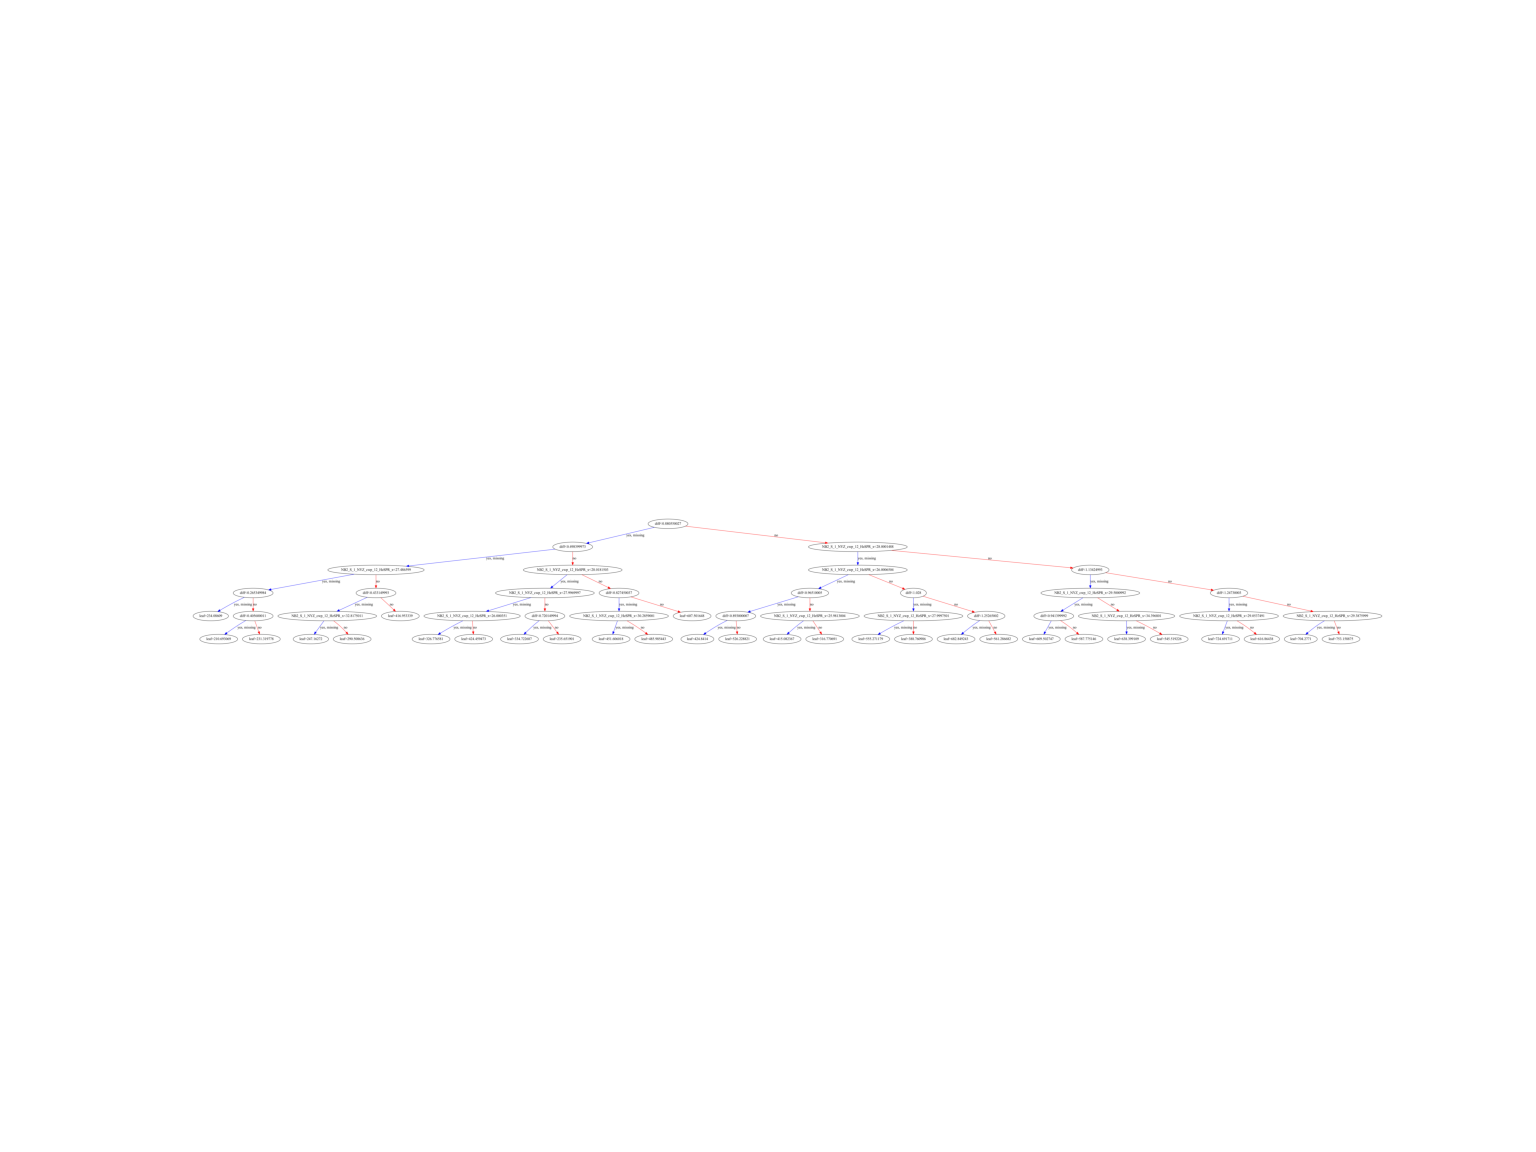

In [ ]:
xgb.plot_tree(xgb_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

<IPython.core.display.Javascript object>


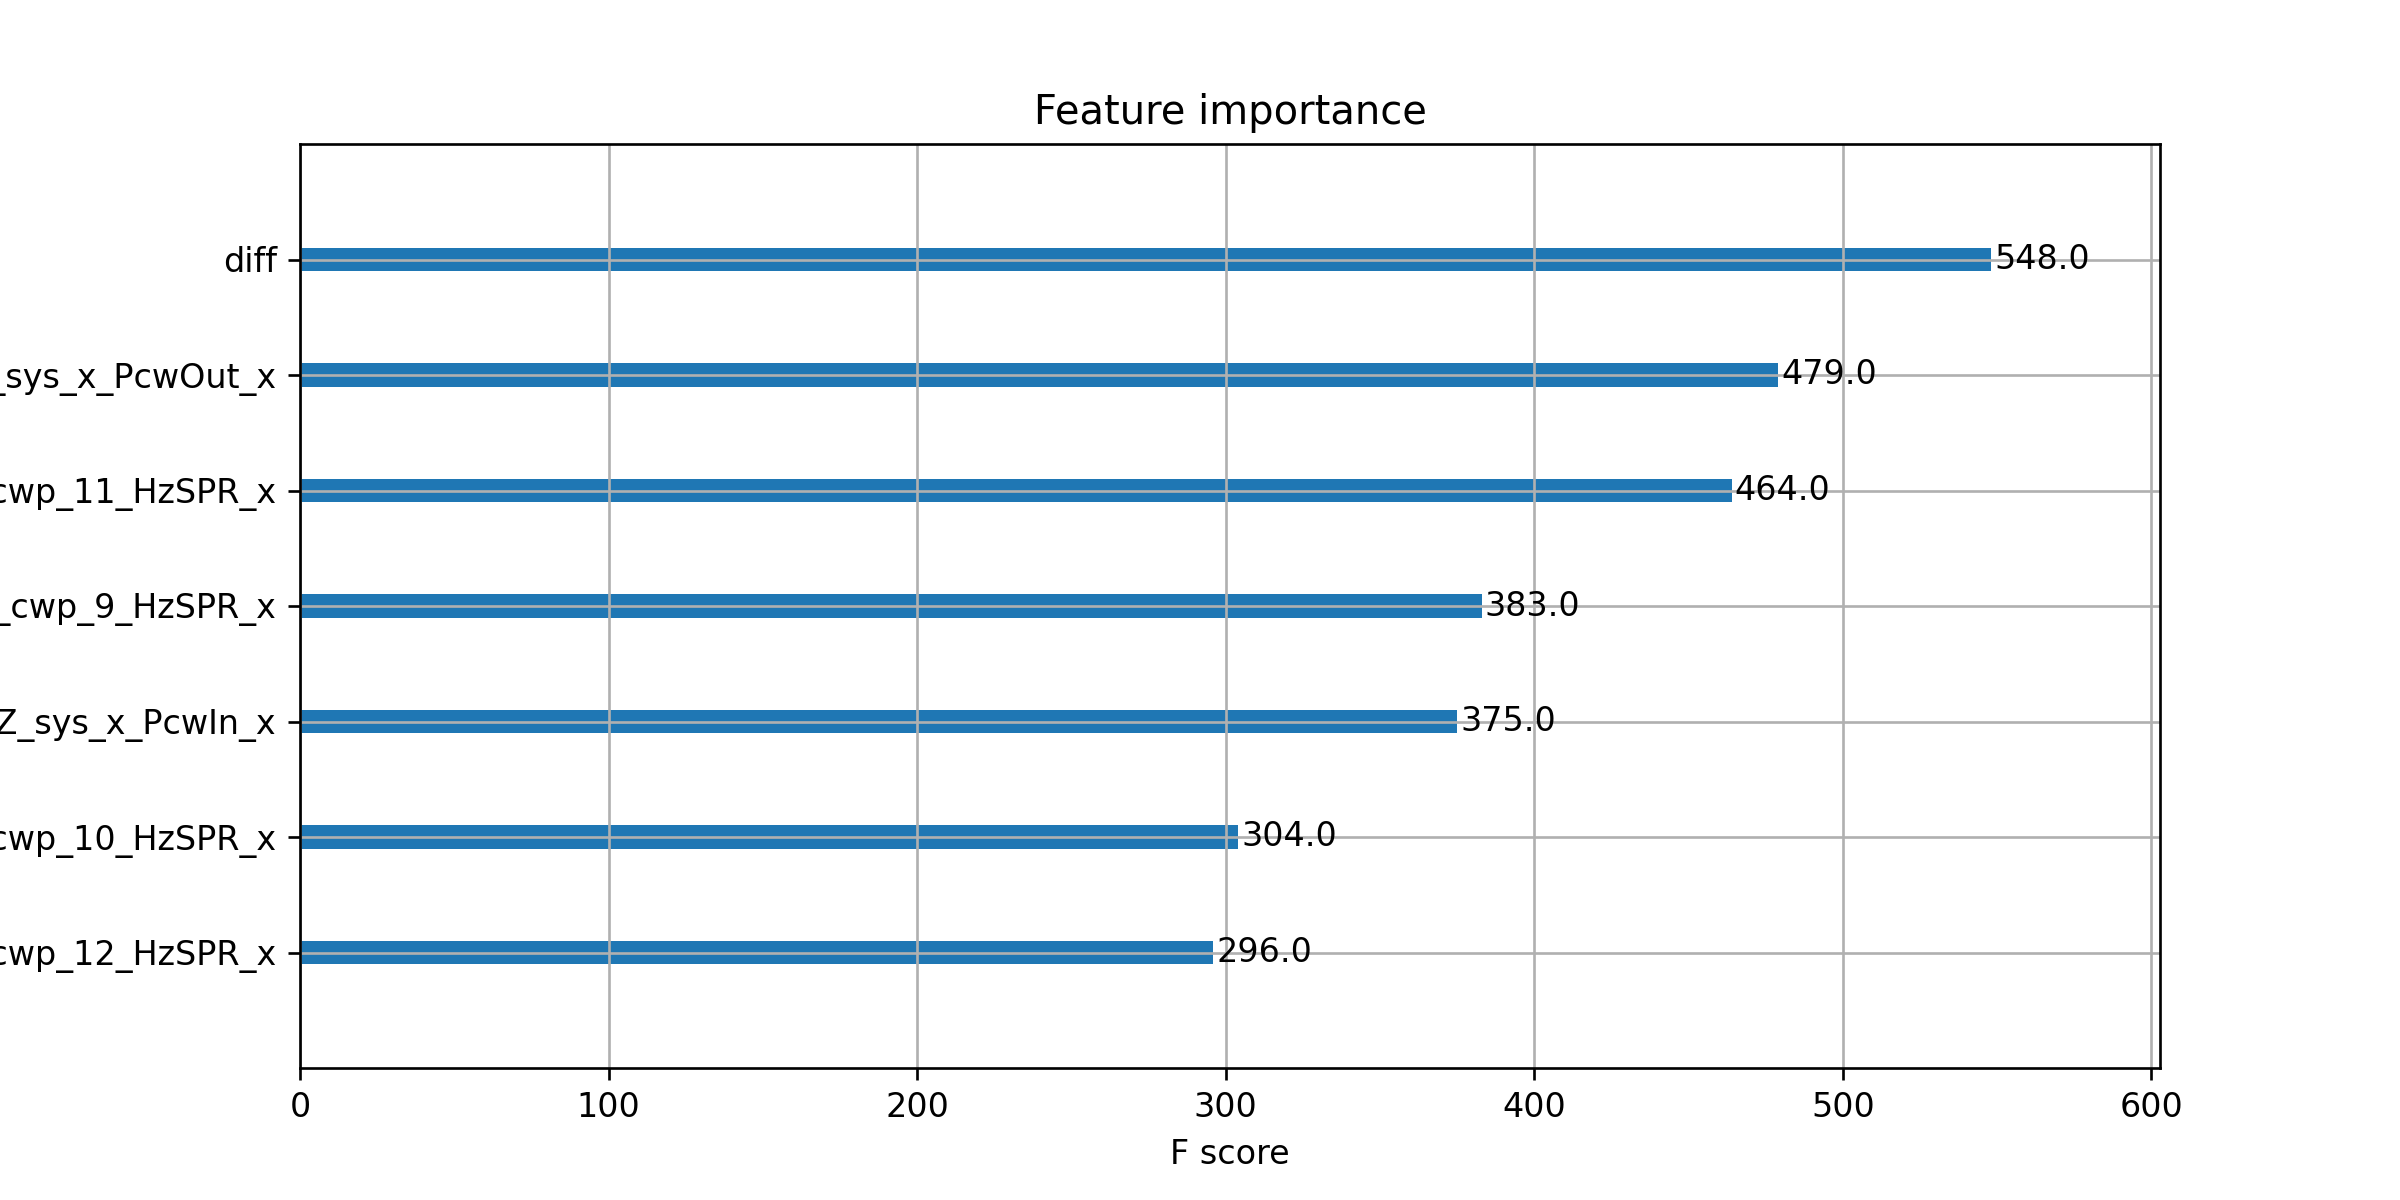

In [ ]:
xgb.plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

## Compare every RMSE to find the best params

In [ ]:
xgb_best_params = {}
min_merror = np.inf
for n_estimators in range(10, 100, 10):
    param['n_estimators'] = n_estimators
    cv_results = xgb.cv(param, xgb_train, nfold = 3, num_boost_round = 1000, metrics="mae", early_stopping_rounds = 30, seed = 1) 
    mean_error = min(cv_results['test-mae-mean'])
    boost_rounds = np.argmin(cv_results['test-mae-mean'])
    
    if mean_error < min_merror:
        min_merror = mean_error
        xgb_best_params["n_estimators"] = n_estimators
        
param["n_estimators"] = xgb_best_params["n_estimators"]
xgb_best_params, min_merror

[13:30:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:30:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:30:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

[13:32:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:32:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

({'n_estimators': 10}, 44.64288231635391)

In [ ]:
min_merror = np.inf
for max_depth in range(6, 11, 1):
    for min_child_weight in range(1,6,1):
        param['max_depth'] = max_depth
        param['min_child_weight'] = min_child_weight
        cv_results = xgb.cv(param, xgb_train, nfold = 3, num_boost_round = 1000, metrics="mae", early_stopping_rounds = 30, seed = 1) 
        mean_error = min(cv_results['test-mae-mean'])
        boost_rounds = np.argmin(cv_results['test-mae-mean'])
    
        if mean_error < min_merror:
            min_merror = mean_error
            xgb_best_params["max_depth"] = max_depth
            xgb_best_params["min_child_weight"] = min_child_weight
        
param["max_depth"] = xgb_best_params["max_depth"]
param["min_child_weight"] = xgb_best_params["min_child_weight"]
xgb_best_params, min_merror

[13:37:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:37:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

[13:40:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:40:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:40:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

[13:43:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:43:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:03] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

[13:46:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:46:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

[13:50:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:50:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[13:50:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

({'n_estimators': 10, 'max_depth': 6, 'min_child_weight': 1},
 45.80967413788008)

In [ ]:
min_merror = np.inf
for gamma in [i/10.0 for i in range(0,5)]:
    param['gamma'] = gamma
    cv_results = xgb.cv(param, xgb_train, nfold = 3, num_boost_round = 1000, metrics="mae", early_stopping_rounds = 30, seed = 1) 
    mean_error = min(cv_results['test-mae-mean'])
    boost_rounds = np.argmin(cv_results['test-mae-mean'])
    
    if mean_error < min_merror:
        min_merror = mean_error
        xgb_best_params["gamma"] = gamma
  
param["gamma"] = xgb_best_params["gamma"]
xgb_best_params,min_merror

[14:02:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:02:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:02:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

({'n_estimators': 10, 'max_depth': 6, 'min_child_weight': 1, 'gamma': 0.3},
 45.753933917917266)

In [ ]:
min_merror = np.inf
for subsample in [i/10.0 for i in range(6,10)]:
    for colsample_bytree in [i/10.0 for i in range(6,10)]:
        param['subsample'] = subsample
        param['colsample_bytree'] = colsample_bytree
        cv_results = xgb.cv(param, xgb_train, nfold = 3, num_boost_round = 1000, metrics="mae", early_stopping_rounds = 30, seed = 1) 
        mean_error = min(cv_results['test-mae-mean'])
        boost_rounds = np.argmin(cv_results['test-mae-mean'])
    
        if mean_error < min_merror:
            min_merror = mean_error
            xgb_best_params["subsample"] = subsample
            xgb_best_params["colsample_bytree"] = colsample_bytree
  
param["subsample"] = xgb_best_params["subsample"]
param["colsample_bytree"] = xgb_best_params["colsample_bytree"]
xgb_best_params,min_merror

[14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:29:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

[14:32:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:32:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:32:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

[14:35:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:35:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:35:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

[14:37:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:37:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

({'n_estimators': 10,
  'max_depth': 6,
  'min_child_weight': 1,
  'gamma': 0.3,
  'subsample': 0.9,
  'colsample_bytree': 0.9},
 37.10143336201357)

In [ ]:
min_merror = np.inf
for reg_alpha in [0.8,0.9,1,1.1,1.2]:
    param['reg_alpha'] = reg_alpha
    cv_results = xgb.cv(param, xgb_train, nfold = 3, num_boost_round = 1000, metrics="mae", early_stopping_rounds = 30, seed = 1) 
    mean_error = min(cv_results['test-mae-mean'])
    boost_rounds = np.argmin(cv_results['test-mae-mean'])
    
    if mean_error < min_merror:
        min_merror = mean_error
        xgb_best_params["reg_alpha"] = reg_alpha
  
param["reg_alpha"] = xgb_best_params["reg_alpha"]
xgb_best_params,min_merror

[14:40:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:40:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:40:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:40:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

({'n_estimators': 10,
  'max_depth': 6,
  'min_child_weight': 1,
  'gamma': 0.3,
  'subsample': 0.9,
  'colsample_bytree': 0.9,
  'reg_alpha': 0.9},
 37.00055601898961)

In [ ]:
min_merror = np.inf
for reg_lambda in [0.8,0.9,1,1.1,1.2]:
    param['reg_lambda'] = reg_lambda
    cv_results = xgb.cv(param, xgb_train, nfold = 3, num_boost_round = 1000, metrics="mae", early_stopping_rounds = 30, seed = 1) 

    mean_error = min(cv_results['test-mae-mean'])
    boost_rounds = np.argmin(cv_results['test-mae-mean'])
    
    if mean_error < min_merror:
        min_merror = mean_error
        xgb_best_params["reg_lambda"] = reg_lambda
  
param["reg_lambda"] = xgb_best_params["reg_lambda"]
xgb_best_params,min_merror

[14:42:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:42:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:42:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

({'n_estimators': 10,
  'max_depth': 6,
  'min_child_weight': 1,
  'gamma': 0.3,
  'subsample': 0.9,
  'colsample_bytree': 0.9,
  'reg_alpha': 0.9,
  'reg_lambda': 0.9},
 36.97610947459157)

In [ ]:
param['eta'] = 0.3
param['n_estimators']= 10
cv_results = xgb.cv(param, xgb_train, nfold = 3, num_boost_round = 1000, metrics="mae",early_stopping_rounds = 30, seed = 1) 
min(cv_results['test-mae-mean'])

[14:48:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:48:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 

36.97610947459157

In [ ]:
bst_params = {
                "objective": "reg:linear",
#               "objective:" : "count:poisson",
              "booster" : "gbtree",
              "eta": 0.3,
              "max_depth": 6,
              'min_child_weight': 1,
              'gamma': 0.3,
              "subsample": 0.9,
              "colsample_bytree": 0.9,
              "alpha": 1.1,
              "silent": 1,
              "seed": 1,
              "gpu_id": 0,
              "max_bin": 16,
              'reg_alpha': 0.9,
              'reg_lambda': 0.9
#               "tree_method": "gpu_exact"
              }

In [ ]:
reg = xgb.XGBRegressor(**bst_params)

In [ ]:
reg.fit(xgb_20_train_X, xgb_20_train_y, eval_set = [(xgb_20_train_X, xgb_20_train_y), (xgb_20_valid_X, xgb_20_valid_y)])


[23:38:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:38:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:1840.92234	validation_1-rmse:1968.55200
[1]	validation_0-rmse:1295.88615	validation_1-rmse:1419.60126
[2]	validation_0-rmse:911.13649	validation_1-rmse:1017.15467
[3]	validation_0-rmse:646.55177	validation_1-rmse:757.41723
[4]	validation_0-rmse:459.05229	validation_1-rmse:567.60571
[5]	validation_0-rmse:330.26388	validatio

XGBRegressor(alpha=1.1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0.3, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=16, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [ ]:
eval_result = reg.evals_result()

<IPython.core.display.Javascript object>


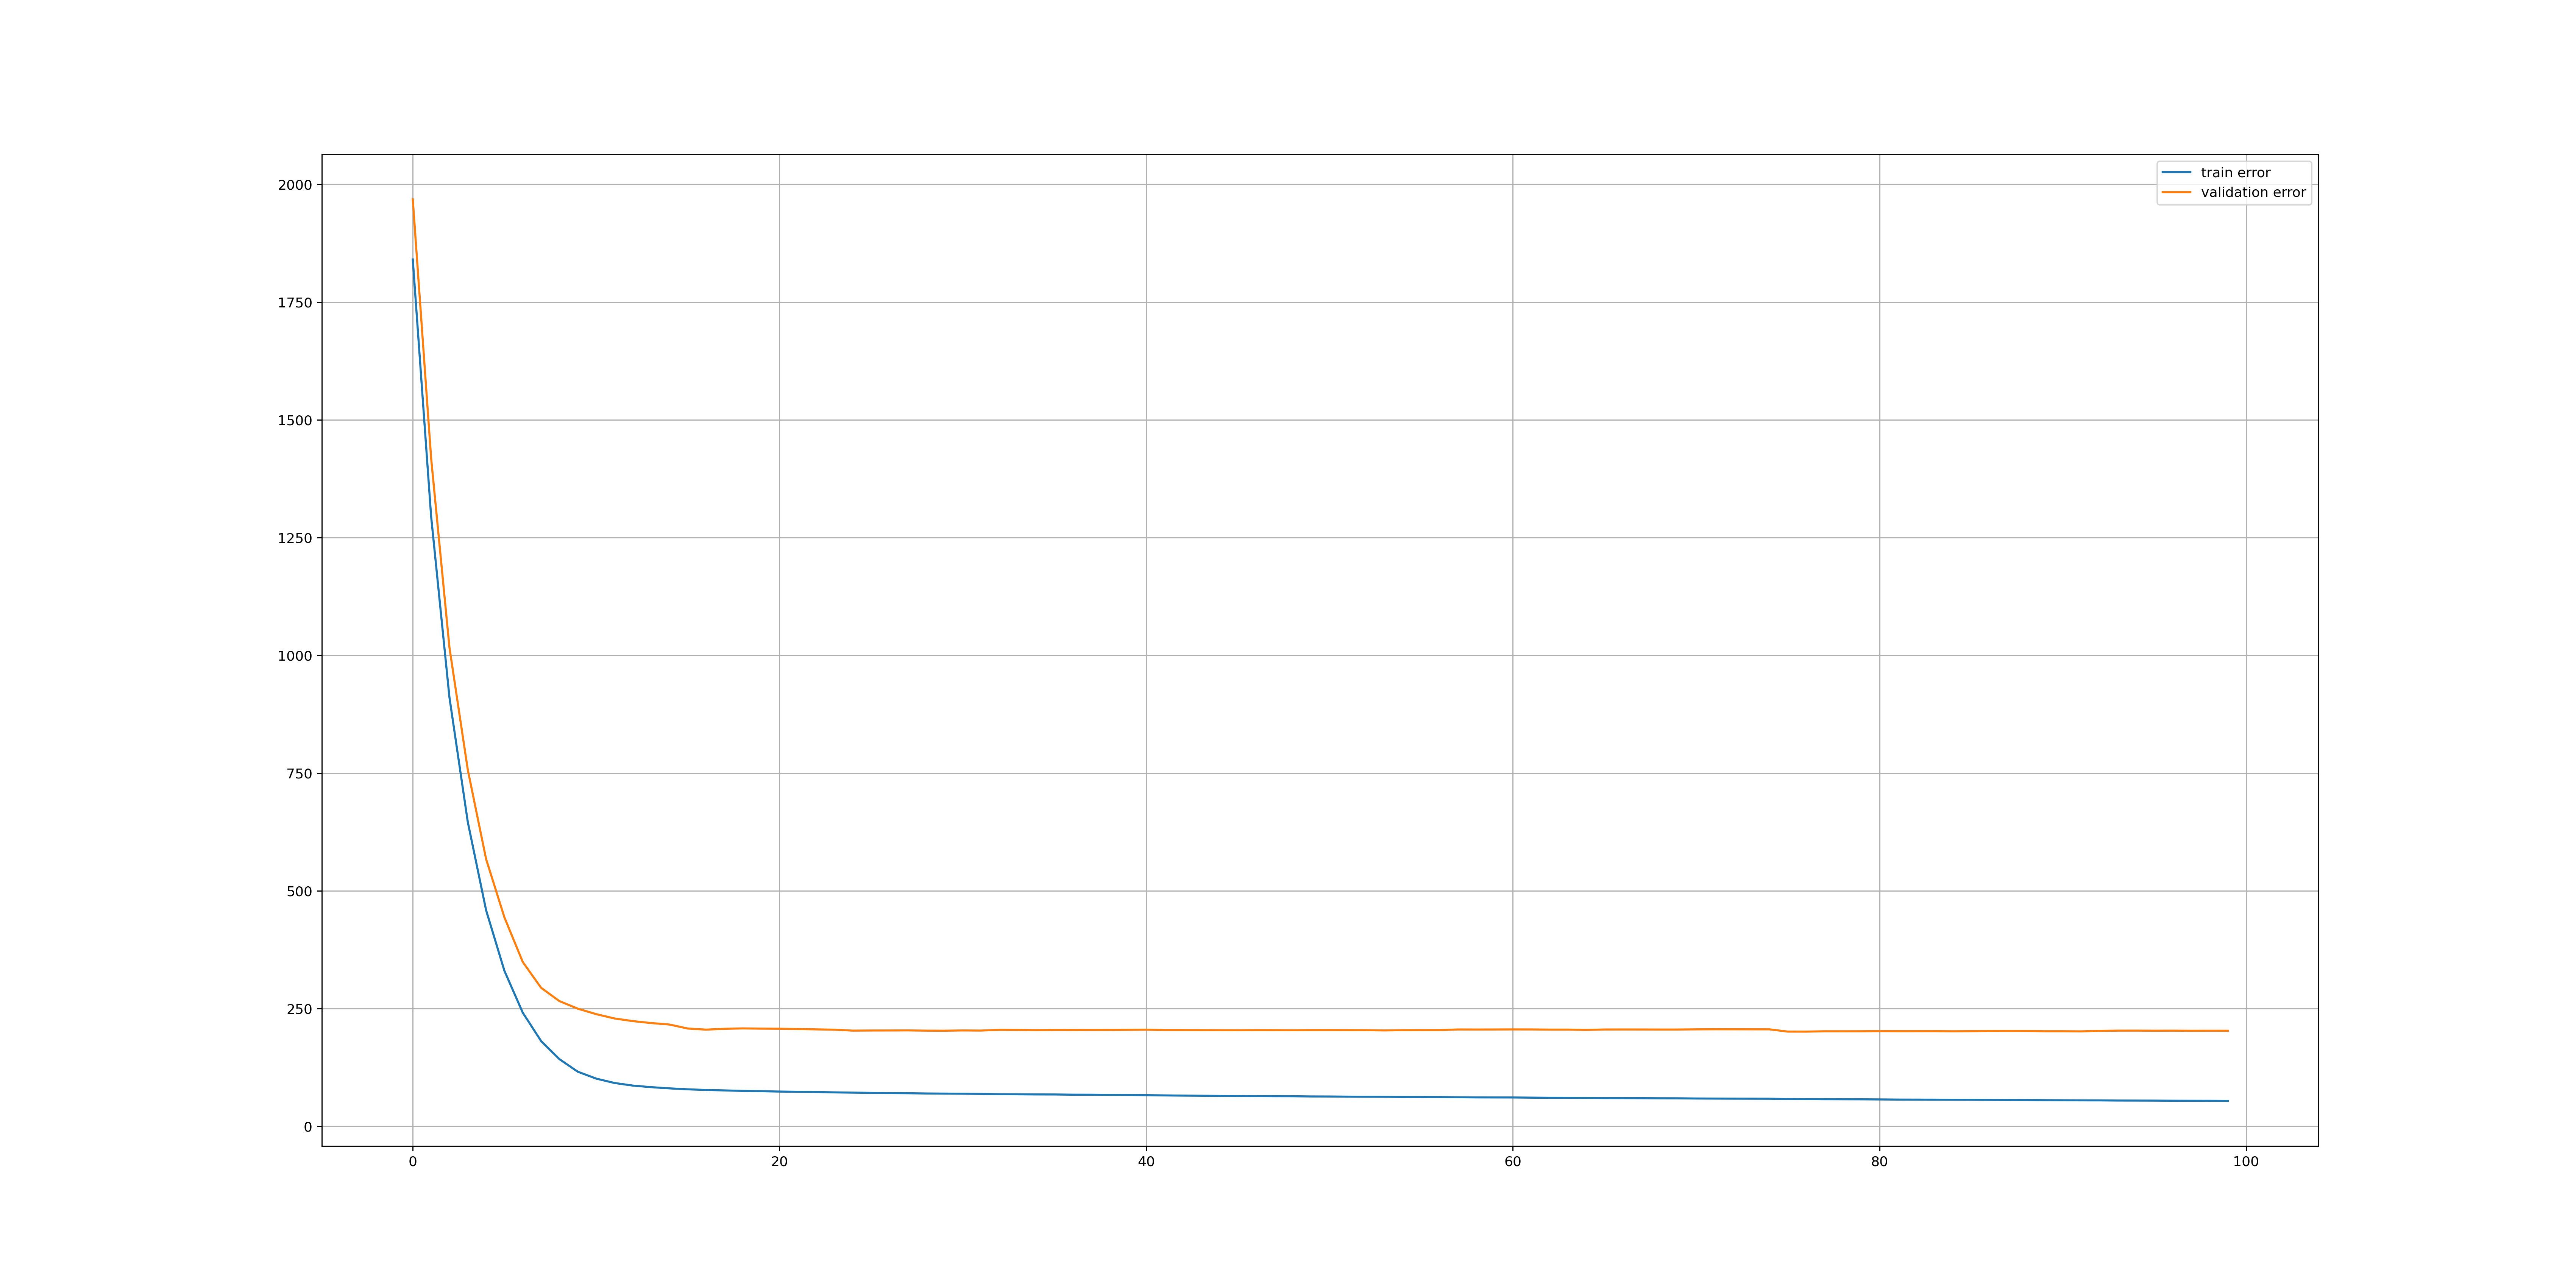

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(len(eval_result["validation_0"]["rmse"])),eval_result["validation_0"]["rmse"], label = 'train error')
ax.plot(range(len(eval_result["validation_1"]["rmse"])),eval_result["validation_1"]["rmse"], label = 'validation error')
ax.grid(True)

ax.legend()
# plt.show()

In [ ]:
y_test_pred = reg.predict(xgb_21_X)
print("XGB - test r2 score: %2f" % r2_score(y_test_pred, xgb_21_Y))

XGB - test r2 score: -0.548032


In [ ]:
y_pred_val = reg.predict(xgb_20_valid_X)

print("XGB - valiation r2 score: %2f" % r2_score(y_pred_val, xgb_20_valid_y))

XGB - valiation r2 score: 0.940337


<IPython.core.display.Javascript object>


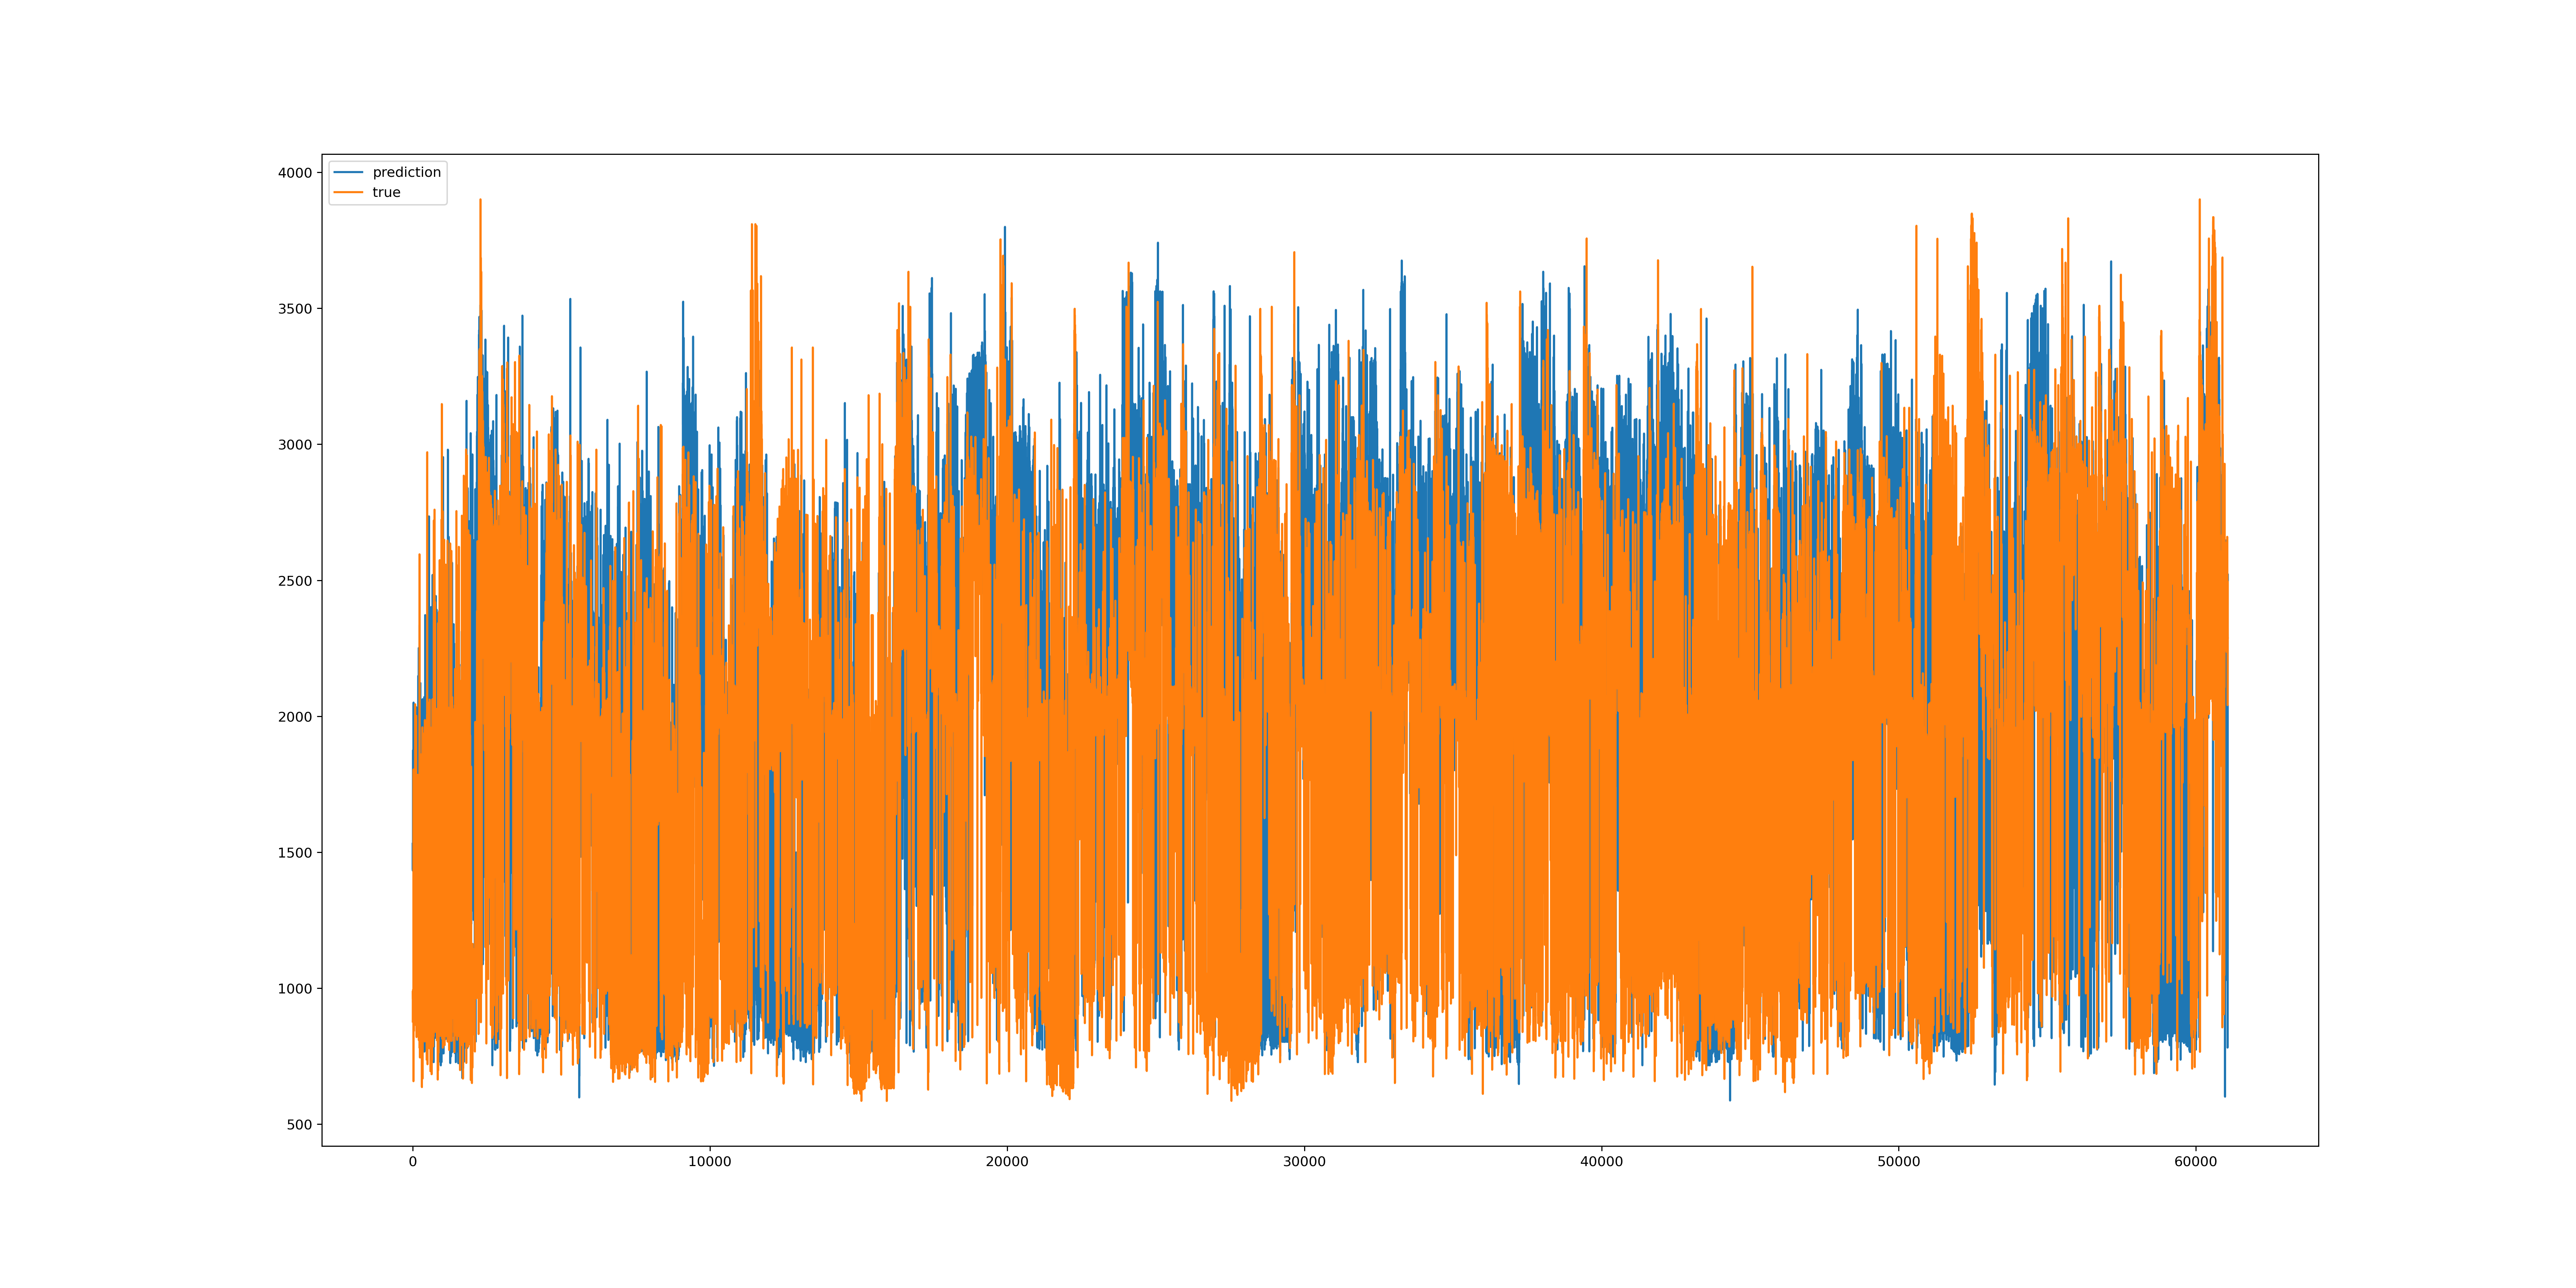

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(1, len(y_test_pred)+1), y_test_pred,label='prediction')
ax.plot(range(1, len(Y_test)+1), xgb_21_y,label='true')
ax.legend()